In [1]:
import pandas as pd

In [3]:
import numpy as np

In [6]:
import seaborn as sns

In [41]:
mpg = pd.read_csv('mpg.csv')

In [43]:
#drv에 이상치 할당
#cf) drv(구동방식) 값은 4(4륜구동)/f(전륜구동)/r(후륜구동) 이렇게 3가지임
# 존재할 수 없는 k 값을 drv의 이상치 값으로 할당
mpg.loc[[9,13,57,92],['drv']] = 'k'

In [45]:
#cty에 이상치 할당
mpg.loc[[28,42,128,202],'cty'] = [3,4,39,42]

In [47]:
#Q1
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [49]:
mpg['drv'] = np.where(
    mpg['drv'].isin(['4','f','r']),
    mpg['drv'],np.nan
)

In [51]:
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
r     24
Name: count, dtype: int64

<Axes: ylabel='cty'>

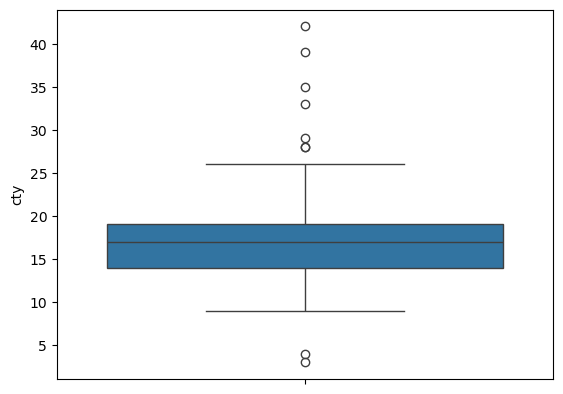

In [57]:
#Q2
sns.boxplot(data=mpg, y='cty')

In [60]:
pct25 = mpg['cty'].quantile(.25)

In [62]:
pct75 = mpg['cty'].quantile(.75)

In [65]:
iqr = pct75-pct25

In [69]:
pct25-1.5*iqr

6.5

In [71]:
pct75+1.5*iqr

26.5

In [74]:
mpg['cty'] = np.where(
    (mpg['cty']<6.5) | (mpg['cty']>26.5),
    np.nan, mpg['cty']
)

In [77]:
mpg['cty'].isna().sum()

9

<Axes: ylabel='cty'>

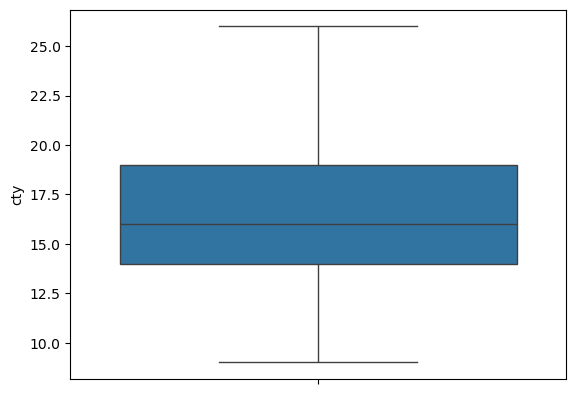

In [80]:
sns.boxplot(data=mpg, y = 'cty')

In [87]:
#Q3
mpg.dropna(subset=['cty','drv']) \
    .groupby(mpg['drv']) \
    .agg(mean_cty = ('cty','mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
